<a href="https://colab.research.google.com/github/changyong93/KaggleStruggle/blob/main/210627_programmer_Lev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 블록이동하기

In [ ]:
from collections import deque
def find_path(p1,p2,new_board):
    y,x = 0,1 #y : 행방향, x : 열방향
    paths = []
    #평행이동
    delta = [(0,1),(0,-1),(1,0),(-1,0)]
    for dy,dx in delta:
        next1 = (p1[y]+dy, p1[x]+dx)
        next2 = (p2[y]+dy, p2[x]+dx)
        print(next1,next2,new_board[next1[y]][next1[x]] , new_board[next2[y]][next2[x]],new_board[next1[y]][next1[x]] and new_board[next2[y]][next2[x]])
        if new_board[next1[y]][next1[x]] and new_board[next2[y]][next2[x]]:
            paths.append((next1,next2))
    #회전
    cw,ccw = -1,1 #ccw 기준
    for rot in [cw,ccw]:
        if p1[y] == p2[y]: #로봇이 세로로 있을 때
            if new_board[p1[y]][p1[x]+rot] and new_board[p2[y]][p2[x]+rot]:
                paths.append((p1, (p1[y], p1[x]+rot)))
                paths.append((p2, (p2[y], p2[x]+rot)))
        else: #로봇이 가로로 있을 때
            if new_board[p1[y]+rot][p1[x]] and new_board[p2[y]+rot][p2[x]]:
                paths.append((p1, (p1[y]+rot, p1[x])))
                paths.append((p2, (p2[y]+rot, p2[x])))
    return paths

def solution(board):
    n = len(board)
    new_board = [[False]*(n+2) for _ in range(n+2)]
    for i in range(n):
        for j in range(n):
            new_board[i+1][j+1] = True if board[i][j]==0 else False
    q = deque([[(1,1),(1,2),0]])
    visited = set([((1,1),(1,2))])
    while q:
        p1,p2,cnt = q.popleft()
        cnt += 1
        a = find_path(p1,p2,new_board)
        # for cur in find_path(p1,p2,new_board):
            # if (n,n) in cur:
            #     return cnt
            # print(cur, cur in visited)
            # if cur not in visited:
            #     q.append((cur, cnt))
            #     visited.add(cur)
    
solution([[0, 0, 0, 1, 1],[0, 0, 0, 1, 0],[0, 1, 0, 1, 1],[1, 1, 0, 0, 1],[0, 0, 0, 0, 0]])

In [ ]:
from collections import deque
def find_path(pre,new_board):
    y,x = 0,1 #y : 행방향, x : 열방향
    y1,x1 = pre[0][0],pre[0][1]
    y2,x2 = pre[1][0],pre[1][1]
    paths = []
    #평행이동
    delta = [(0,1),(0,-1),(1,0),(-1,0)]
    for dy,dx in delta:
        next1 = (y1+dy, x1+dx)
        next2 = (y2+dy, x2+dx)
        if new_board[next1[y]][next1[x]] and new_board[next2[y]][next2[x]]:
            paths.append((next1,next2))
    #회전
    cw,ccw = -1,1 #ccw 기준
    for rot in [cw,ccw]:
        if y1 == y2: #로봇이 세로로 있을 때
            if new_board[y1+rot][x1] and new_board[y2+rot][x2]:
                paths.append(((y1,x1), (y1+rot, x1)))
                paths.append(((y2,x2), (y2+rot, x2)))
        else: #로봇이 가로로 있을 때
            if new_board[y1][x1+rot] and new_board[y2][x2+rot]:
                paths.append(((y1,x1), (y1, x1+rot)))
                paths.append(((y2,x2), (y2, x2+rot)))
    return paths

def solution(board):
    n = len(board)
    new_board = [[False]*(n+2) for _ in range(n+2)]
    for i in range(n):
        for j in range(n):
            new_board[i+1][j+1] = True if board[i][j]==0 else False
    q = deque([[((1,1),(1,2)),0]])
    visited = set([((1,1),(1,2))])
    while q:
        pre,cnt = q.popleft()
        cnt += 1
        for cur in find_path(pre,new_board):
            if (n,n) in cur:
                return cnt
            if cur not in visited:
                q.append((cur, cnt))
                visited.add(cur)
    
solution([[0, 0, 0, 1, 1], [0, 0, 0, 1, 0], [0, 1, 0, 1, 1], [1, 1, 0, 0, 1], [0, 0, 0, 0, 0]])

- BFS로 최단경로 출력
- DFS(using Stack)으로도 구할 순 있으나, dfs로 하게 될 경우 모든 경로를 탐색해보고 그 중 가장 짧은 거리를 출력해야 함
- 반면에, BFS로 하면, 전체 경로를 순차적으로 확인하기에 가장 먼저 end point에 도달한 횟수를 출력하면 되므로, 이 문제에선 bfs >> dfs

## 입국심사 - 이분탐색
---
이분 탐색(시간복잡도 logO)
- **정렬된 데이터**에서 특정 값이 존재하는지 검색하는 알고리즘
- 기준 값을 구해서 그 값을 기준으로 데이터를 나눠서 검색하는 방법
- 특정 값을 찾을 때 기본 이진 탐색으로 가능

일반적인 이진분류
- start, end 범위를 지정하고 그 중간인 mid idex 값을 출력하여
    - 목표 값보다 크면 end = mid -1, 작으면 start = min + 1을 한다
    - 목표 값보다 큰 경우를 예를 들면, 현재 mid를 포함한 값들은 전부 목표와 상관 없는 값이기에 mid값까지 포함하여 제외시켜주는 것이다
- 이진 분류는 재귀적 방법과 비재귀적 방법이 존재한다
  - 단, 재귀적 방법은 함수 내에서 또 함수를 호출하기에 비재귀보다 성능이 나쁘며
  - 콜스택(callstack)이슈도 발생할 수 있다.
- 단, 중복된 데이터에서 탐색할 때는 조금 더 응용된 방법을 사용
  - lower bound, upper bound
    - lower bound : 데이터 내에서 특정 값보다 크거나 같은 값이 처음 나오는 위치를 리턴
    - upper bound : 특정 값보다 처음으로 큰 값이 나오는 위치를 리턴
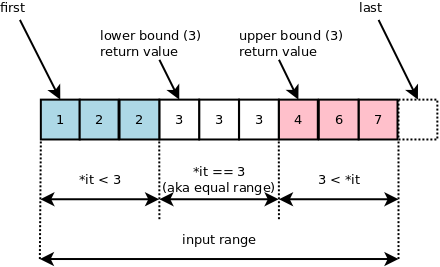
---

lower bound

---
- 이 문제에선, 심사관마다 걸리는 시간 times와 처리해야 할 인원수를 주는데, n명을 처리하기 위한 최소 값을 찾아야 한다.
- 따라서 일반적인 이진탐색을 할 경우, 최적 값이 아니라 단순히 6명을 처리하기 위한 유사 시간대를 구하기 때문에 안된다.
- upper bound를 할 경우, n+1명을 처리하기 위한 최소 시간을 구하기 때문에 안됨
- 따라서 lower bound로 구해야 하는데, 코드는 조금씩 차이가 있음

- 일반 탐색 : 3 찾기 [1,2,3,4,5,6,7,8,9] => idx = 2
- lower bound : 3(min index) 찾기 [1,2,3,3,3,3,7,8,9] => idx = 2
- upper bound : 3(max index) 찾기 [1,2,3,3,3,3,7,8,9] => idx = 7 - 1 = 6

In [ ]:
def solution(n, times):
    answer = max(times)*n #
    l,r = 0, answer #주어진 시간 min, max (임의 지정)
    while l <= r: # l==r이 같은 상황일 때도 목표를 잘 출력하고 최소시간인지 확인해야 함
        mid = (l+r)//2
        done_num = sum(mid//time for time in times)
        print(l,r,mid,done_num)
        if done_num >= n: #원하는 것 이상을 수행한 경우, 시간을 줄일 수 있는지도 확인
            r = mid - 1
            answer = min(answer,mid)
        elif done_num < n: #원하는 것만큼 수행하지 못한 경우
            l = mid + 1
        print(answer)
    return answer
solution(6,[7,10])

위아래 코드는 같은 lower bound지만, done>= n 일 때 r의 값이 다름
- r = mid - 1인 경우 while 조건 : l <= r & answer 따로 지정
  - 원하는 값을 출력하는 최소 값을 찾을 때, 한 번 탐색한 값은 다시 안하기에 마지막에 도달하면 원하는 값과 별개의 값 출력
  - ex) l = 27, r = 29 => mid = 28, 28이 최적인지 확인하기 위해 r = 27이 부여되고, l,r이 27일 때 마지막으로 탐색하고 종료

- r = mid 인 경우 while 조건 : l < r & answer 미지정
  - 원하는 값을 출력하는 최소 값을 찾을 때, 원하는 값과 동일한 값이 출력되면, 해당값을 포함한 값을 다시 탐색범위에 넣기에 불필요
  - ex) l = 27, r = 29 => mid = 28, 28이 최적인지 확인하기 위해 r = 28이 부여되고, l,r이 28일 때 원하는 값보다 작으므로 l +=1 되며 종료

In [ ]:
def solution(n, times):
    answer = max(times)*n
    l,r = 0, answer
    while l < r: 
        mid = (l+r)//2
        done_num = sum(mid//time for time in times)
        print(l,r,mid,done_num)
        if done_num >= n:
            r = mid
            # answer = min(answer,mid)
        elif done_num < n:
            l = mid+1
    return l
solution(6,[7,10])

In [ ]:
def solution(n, times):
    answer = max(times)*n
    l,r = 0, answer
    while l < r: 
        mid = (l+r)//2
        done_num = sum(mid//time for time in times)
        print(l,r,mid,done_num)
        if done_num > n:
            r = mid
            # answer = min(answer,mid)
        elif done_num <= n:
            l = mid+1
    return l - 1
solution(6,[7,10])

## 징검다리 - 이분탐색

In [ ]:
def solution(distance, rocks, n):
    answer = sorted(rocks + [0, 25])
    dist = [answer[i+1] - answer[i] for i in range(len(answer)-1)]
    for _ in range(n):
        idx = dist.index(min(dist))
        dist[idx+1] += dist[idx]
        dist.pop(idx)
    
    return min(dist)

- 최소 거리를 제거하며 구해보고자 함.
- 정답은 맞추나, 런타임 오류 발생


In [ ]:
def solution(distance, rocks, n):
    all_point = sorted(rocks + [0,distance])
    dist = [all_point[i+1] - all_point[i] for i in range(len(all_point)-1)]

    s,e = 0,distance
    while s < e:
        cum_d,cnt = 0,0
        mid = (s+e)//2
        for d in dist:
            if d + cum_d >=mid: #cum_d가 0이 아닌 경우 이전 a개의 바위를 제거한 상태의 거리가 됨
                cum_d = 0
            else: #mid 값보다 작은 경우 바위를 파괴하여 거리를 늘림
                cum_d += d
                cnt += 1
        if cnt > n:
            e = mid
        else:
            s = mid + 1
    return s-1

upper bind 문제
---
- 해당 문제에서는 n개 이하의 바위를 제거하여 start, stone_loc, end 사이 거리를 최대로 늘리는 알고리즘은 작성 구현하는 것
- 따라서 n 이하의 최대 거리를 찾아야 함

## 네트워크 - BFS/DFS

In [ ]:
def dfs(start_node, graph):
    visit = []
    st = [start_node]
    
    while st:
        node = st.pop()
        if node not in visit:
            visit.append(node)
            st.extend(graph[node])
    
    return ''.join(sorted(map(str,visit)))
    
def solution(n, computers):
    graph = {i : [] for i in range(n)}
    for i,computer in enumerate(computers):
        for j, node in enumerate(computer):
            if i!=j and node != 0:
                graph[i].append(j)
    
    paths = set([dfs(node,graph) for node in graph])
    return len(paths)

2중 for문으로 인해 시간복잡도가 너무 큼(O(n^2))

### 다른 사람 풀이(1)-dfs(bfs)
- 내 경우는, 한 경로를 두 번 탐색하지만, 아래처럼 visited를 지정할 경우 넘어갈 수 있음

In [ ]:
# from collections import deque
def solution(n, computers):
    visited = [False for _ in range(n)]
    
    def dfs(computers, visited, start):
        st = [start]
        # st = deque([start])
        while st:
            i = st.pop()
            # i = st.popleft()
            if visited[i]:
                continue
            
            visited[i] = True
            for j in range(n):
                if computers[i][j] and not(visited[j]):
                    st.append(j)
    i = 0
    answer = 0
    while not(all(visited)):
        if not(visited[i]):
            dfs(computers,visited,i)
            answer += 1
        i += 1
    return answer

## 단어변환 - BFS/DFS
---
해당 문제는 begin 단어를 target 단어로 만드는 최소한의 횟수를 구하는 문제임으로, 단순히 답을 찾는 dfs가 아니라, 변환을 전체적으로 1번씩 늘려가면서 찾아가는 bfs가 적합하다

In [ ]:
from collections import deque

def next_word(cur,nxt):
    miss = 0
    for s1,s2 in zip(cur,nxt):
        if s1 != s2:
            miss += 1
            if miss == 2:
                return False
    
    return True if miss == 1 else False
                
def solution(begin, target, words):
    if target not in words:
        return 0
    
    q = deque([(begin, 0)])
    while q:
        word, cnt = q.popleft()
        # print(word,cnt)
        for i,w in enumerate(words):
            if w == '':
              continue
              
            if next_word(word, w):
                if w == target:
                    return cnt + 1
                
                q.append((w, cnt+1))
                words[i] = ''

### 다른 사람 풀이(1)
---
- genereator를 이용하여 조건에 맞는 단어 출력
- 단 해당 코드는, 단어가 길어질 경우, 모든 string의 miss 여부를 판단하기에 런타임이 길어질 수 있음

In [ ]:
from collections import deque

def next_word(cur,words,visited):
    for nxt in words:
        if nxt in visited:
            continue
            
        miss = 0
        for s1,s2 in zip(cur,nxt):
            if s1 != s2:
                miss += 1
        if miss == 1:
            yield nxt
                
def solution(begin, target, words):
    if target not in words:
        return 0
    
    visited = []
    q = deque([(begin, 0)])
    while q:
        word, cnt = q.popleft()
        visited.append(word)
        for w in next_word(word, words,visited):
            if w == target:
                return cnt + 1
            q.append((w, cnt+1))
            
                
                
        

## 여행경로 - BFS / DFS

In [ ]:
from collections import deque

def find_paths(pre,tickets,visited):
    nxt = []
    for ticket in tickets:
        if ticket in visited:
            continue
        if pre == ticket[0]:
            nxt.append(ticket)
    return nxt
    
def solution(tickets):
    all_paths = []
    max_len = len(tickets)+1
    
    
    q = deque([(["ICN"],[])])
    while q:
        pre, visited = q.popleft()
        for _,cur in find_paths(pre[-1],tickets,visited):
            if len(pre + [cur]) == max_len:
                all_paths.append(pre + [cur])
                continue
            q.append([pre + [cur], visited + [[pre[-1],cur]]])
        
    # return min(all_paths)
    return sorted(all_paths)[0]

- 테스트 케이스는 모두 통과하지만 테스트 1번을 통과 못함
- 아무래도 min(all_paths)에서 단어별 sorting이 아닌 단어의 첫 알파벳으로 sort가 되는 것으로 보임 ex) AAA - AAB -BCA 와 AAA - ABB - ABC 가 있을 때 후자로 선택되는 것으로 보임
- @@@@@@@@@@@@@@@@@@@@@@@@
- return sorted(all_paths)[0]로 했을 땐 런타임 에러..
---
- dict로 모든 경로를 모아놓는데, 단 reverse sorting한 상태로 진행
- 이럴 경우, 정확한 경로에서 알파벳 순으로 앞서는 경로를 우선적으로 탐색하기에 문제에서 원하는 알파벳 순서가 우선되는 경로를 찾을 수 있음

In [ ]:
from collections import deque, defaultdict
from bisect import insort
def solution(tickets):
    tickets.sort(reverse = True)
    routes = defaultdict(list)
    for start, end in tickets:
        routes[start].append(end)
    
    fine_path = deque()
    st = ["ICN"]
    while st:
        pre = st[-1]
        if pre not in routes or len(routes[pre]) == 0:
            fine_path.appendleft(st.pop())
        else:
            st.append(routes[pre].pop())
    return list(fine_path)

## N으로 표현 - DP

In [ ]:
from collections import deque
def solution(N, number):
    if N == number:
        return 1
    
    ops = lambda a : (a*10 + N, N*10+a, a+N, a-N, N-a, a//N, a*N)
    q = deque([(0,0)])
    while q:
        pre,cnt = q.popleft()    
        for cur in ops(pre):
            if cur == number:
                return cnt + 1  
            if cnt == 7:
                continue
            else:
                q.append((cur, cnt+1))
    return -1
        

불필요한 연산이 포함되어 있고, 필요한 연산이 제외됨 => DP로 풀기

---
풀이 방법
- 문제의 요점 : 사칙연산을 통해 number가 되는 최소 N의 개수를 구하기
- ex) 5로 12만들기 : result = 4
  - 12 = 5 + 5 + (5/5) + (5/5)
  - 12 = 55/5 + 5/5
  - 12 = (55+5) / 5
- 즉 12를 만드는 최소 5의 개수는 4이다.
- 어떻게 풀면 되나?
  - 우선, 우리가 사용할 수 있는 N의 개수는 최대 8개, 그것을 넘어가면 -1 return
  - N = 1일 때 => 5
  - N = 2일 때 => 55, 5x5, 5-5, 5//5, 5*5
  - N = 3일 때 => 555, 55+5, 55-5, 55//5, 55x5, 5+55, 5-55, 5/55, 5x55
  - 즉, N이 V개일 때는   
  set(Set1과 SetV-1의 사칙연산 결과,   
       Set2과 SetV-2의 사칙연산 결과,   
      Set3과 SetV-3의 사칙연산 결과,   
      ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '   
      SetV-1과 Set1의 사칙연산 결과)   
      로 볼 수 있다
      - 4 = 1+3 = 2+2 = 3+1
      - 5 = 1+4 = 2+3 = 3+2 = 4 + 1

  - 따라서 풀이방법은 아래와 같다
    - 1) [ SET x 8 ] 인 리스트를 만듭니다. 각각 N을 1개로 표현하는 수들의 집합, 2개로 표현하는 수들의 집합, ... 8개로 표현하는 수들의 집합이 저장됩니다.
    - 2) 8개의 SET에 개수만큼 N을 연달아 표현되는 수를 집어넣어줍니다.
    - 3) 숫자 N에 대해서 n개를 사용해서 표현한 수의 일반화 수식을 코드로 표현합니다.
      - 1) i에 대해서 1-8까지 순회합니다.
        - 1) j에 대해서 0-i까지 순회합니다.
         - 1) j개를 사용해서 만든 수들의 집합 s[j]를 다음과 같이 순회합니다.
          - 1) i-j-1을 사용해서 만든 수들의 집합 s[i-j-1]를 다음과 같이 순회합니다.
            - 1) op1(s[j] 순회 수)과 op2(s[i-j-1] 순회 수)를 사칙연산합니다. 나눗셈 시 op2는 0이 되면 안됩니다.
            - 2) 사칙연산한 결과 값을 집합 s[i]에 추가합니다.
        - 2) 만약 number가 s[i]에 존재한다면, 반복을 멈추고 i+1번을 반환합니다.
      - 2) 8번을 순회했음에도, number를 못찾는다면, -1을 반환합니다.
      



In [ ]:
def solution(N, number):
    if N == number:
        return 1
    
    s = [set([int(str(N)*i)]) for i in range(1,9)]

    for i in range(1,8):
        for j in range(i):
            for op1 in s[j]:
                for op2 in s[i-j-1]:
                    s[i].update([op1 + op2, op1 - op2, op1 * op2])
                    if op2!=0:
                        s[i].add(op1 // op2)

        if number in s[i]:
            return i+1
    return -1

### 다른 사람 풀이(1)
---
N == 3인 집합의 크기는 N=2와 N=1이 중복되므로 만들고자 하는 횟수 집합 크기의 절반만 확인

In [ ]:
def solution(N, number):
    if N == number:
        return 1
    
    s = [set([int(str(N)*i)]) if i !=0 else set([0]) for i in range(9)]
    for i in range(2,9):
        for j in range(1,i//2+1):
            for x in s[j]:
                for y in s[i-j]:
                    s[i].update([x + y, x - y, y - x, x*y])
                    if y!=0:
                        s[i].add(x // y)
                    if x!=0:
                        s[i].add(y // x)

        if number in s[i]:
            return i
    return -1